# FlyPredict - Flight Fare Prediction Project

## Introduction
This notebook presents a comprehensive machine learning workflow for predicting flight fares using various regression models. The project covers data loading, preprocessing, feature engineering, model training, evaluation, and comparison, culminating in predictions and insights for airline pricing.

## Project Workflow

1. **Importing Libraries**: Essential Python libraries for data analysis, visualization, and machine learning are imported.
2. **Loading the Dataset**: The cleaned flight fare dataset is loaded for analysis.
3. **Data Preprocessing**: Unnecessary columns are removed, and missing values are checked.
4. **Feature Engineering**: New features are created and categorical variables are encoded.
5. **Exploratory Data Analysis**: Visualizations and statistics are used to understand the data distribution and relationships.
6. **Splitting Data**: The dataset is split into training and testing sets.
7. **Model Training**: Multiple regression models are trained on the data.
8. **Model Evaluation**: Models are evaluated using standard metrics.
9. **Model Comparison**: Performance of models is compared to select the best one.
10. **Feature Importance**: Important features influencing price prediction are identified.
11. **Predictions**: The best model is used for predictions, including manual user input demonstration.
12. **Conclusion**: Key findings and recommendations are summarized.

---

## Domain Background

Airlines provide air transport for passengers and cargo using aircraft. Ticket prices are influenced by flight duration, days until departure, and departure/arrival times. Advanced algorithms and machine learning systems are used to optimize pricing and maximize profitability.

## Importing Libraries

Import all necessary Python libraries for data manipulation, visualization, and machine learning.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os 
for dirname , _, filenames in os.walk('/kaggle/input'):
 for filename in filenames:
     print(os.path.join(dirname,filename))

In [3]:
# Load the cleaned flight fare dataset

df=pd.read_csv('Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Data Preprocessing

Remove unnecessary columns and inspect the dataset for missing values.

In [4]:
df=df.drop('Unnamed: 0',axis=1)
df.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956


### Inspect Data Types

View the datatypes of all columns to understand the structure of the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [6]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
airline,300153,6,Vistara,127859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flight,300153,1561,UK-706,3235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_city,300153,6,Delhi,61343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
departure_time,300153,6,Morning,71146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stops,300153,3,one,250863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_time,300153,6,Night,91538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destination_city,300153,6,Mumbai,59097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,300153,2,Economy,206666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,300153.0,NaN,NaN,NaN,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,NaN,NaN,NaN,26.004751,13.561004,1.0,15.0,26.0,38.0,49.0


In [7]:
df.shape


(300153, 11)

In [8]:
df.isnull().sum() 

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

## Exploratory Data Analysis

Analyze the distribution of flights, ticket classes, and prices using visualizations and summary statistics.

### Flight Counts by Airline

Visualize the total number of flights for each airline using a pie chart.

In [9]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

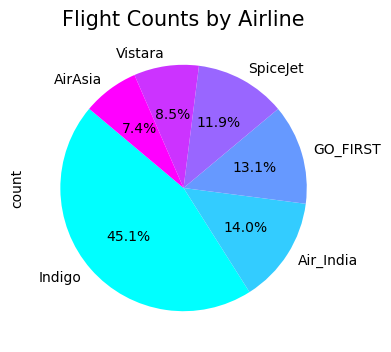

In [10]:
airline_counts=df1.airline.value_counts()
# Create a pie chart
plt.figure(figsize=(4, 4))
df1.airline.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140 , cmap='cool')

# Title and displaying the pie chart
plt.title('Flight Counts by Airline', fontsize=15)
plt.show()

### Ticket Class Distribution

Analyze which ticket class (Economy or Business) has more tickets.

In [11]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

class
Economy     1560
Business     295
Name: count, dtype: int64

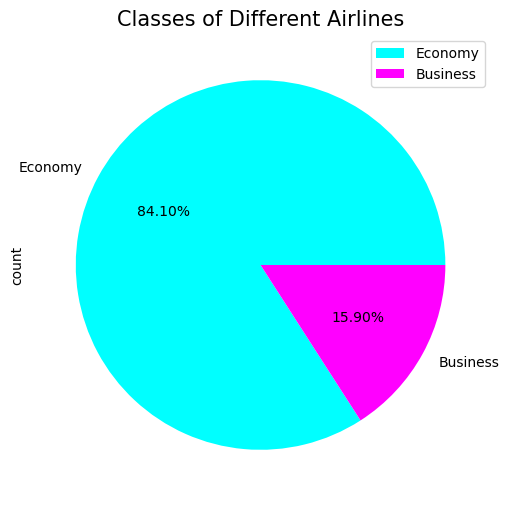

In [12]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f%%',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

### Airline Price Comparison

Compare ticket prices across different airlines using boxplots.

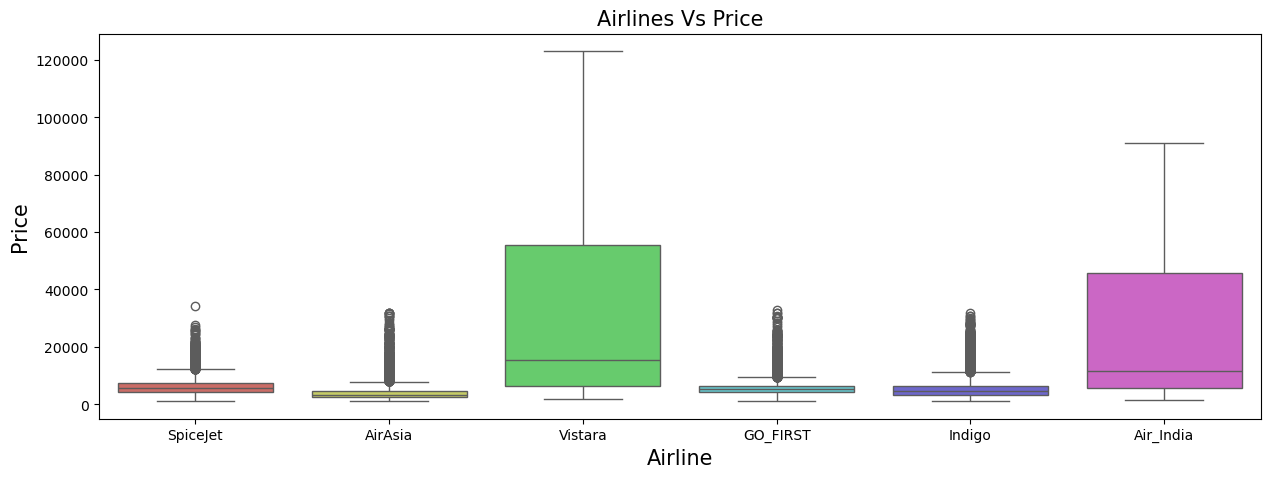

In [13]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### Maximum Ticket Price by Airline

Identify which airline has the highest ticket price.

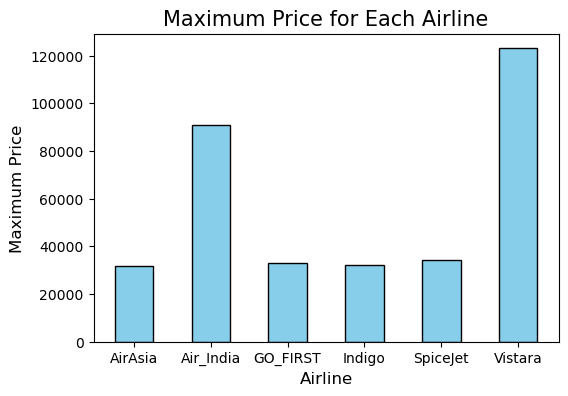

In [14]:
df1 = df.groupby(['airline'], as_index=False).agg({'price': 'max'})
plt.figure(figsize=(6, 4))
plt.bar(df1['airline'], df1['price'], color='skyblue', edgecolor='black' ,width=0.5)
plt.title('Maximum Price for Each Airline', fontsize=15)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Maximum Price', fontsize=12)
plt.show()

### Effect of Departure and Arrival Time on Price

Examine how departure and arrival times influence ticket pricing.

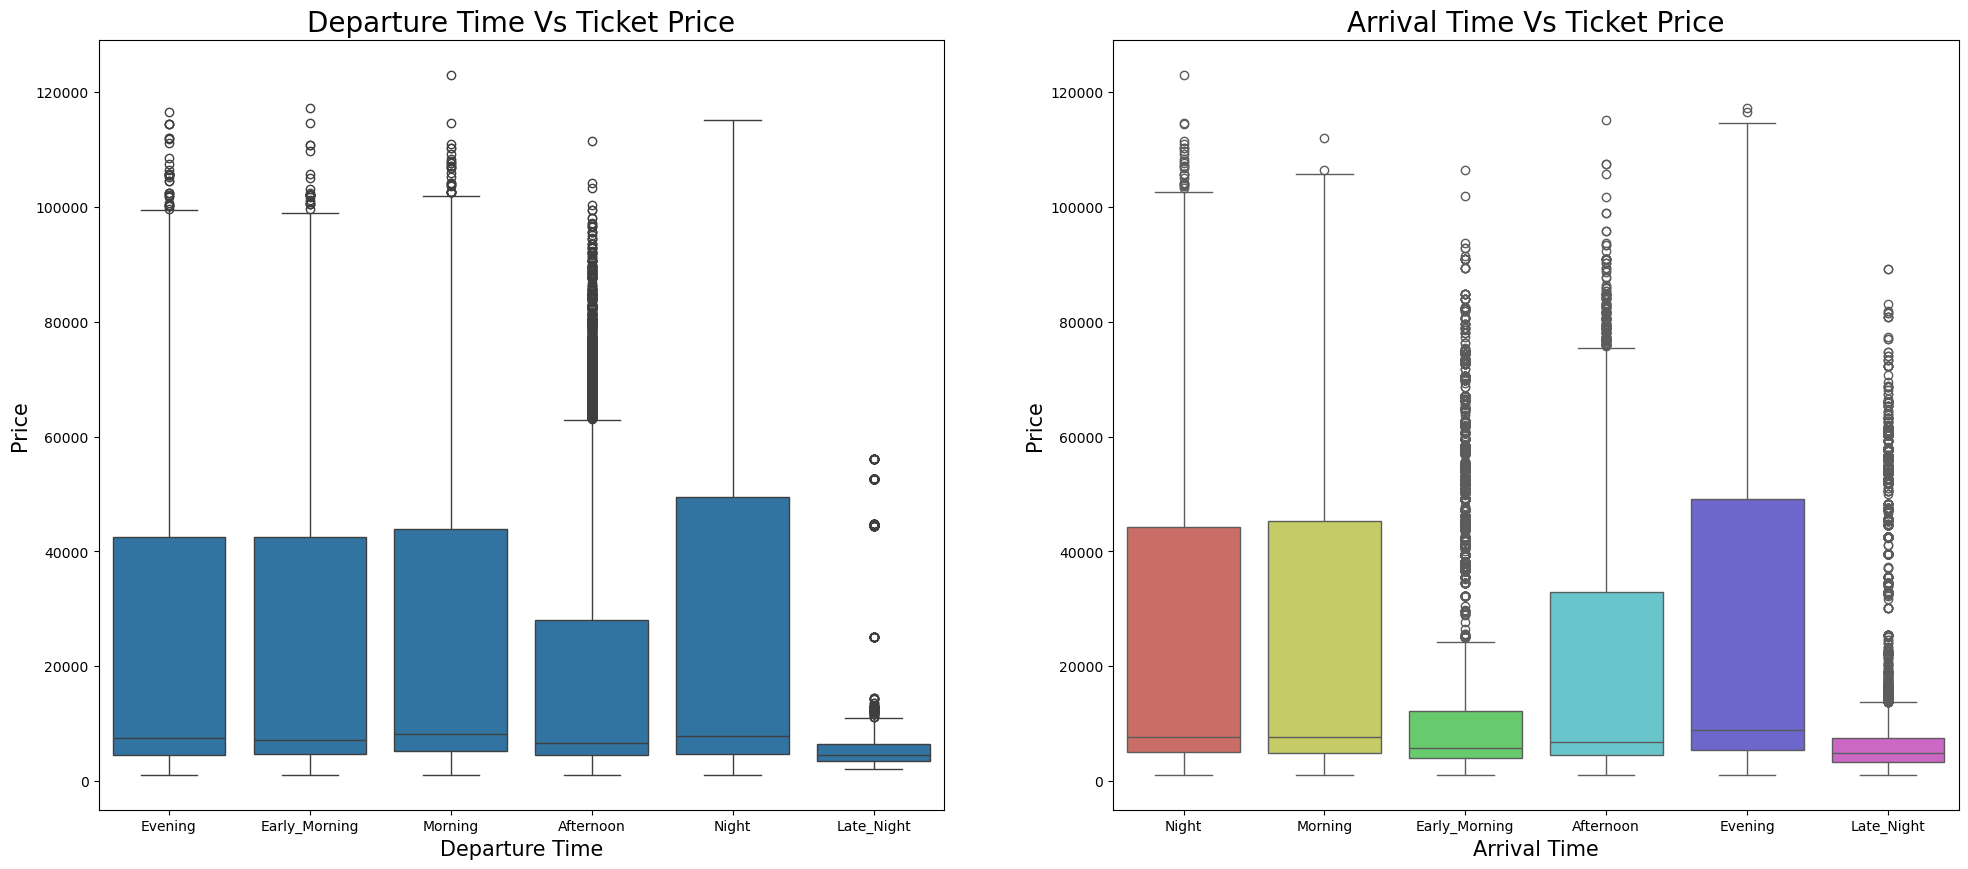

In [15]:

plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### Ticket Price vs. Flight Duration by Class

Visualize the relationship between ticket price and flight duration, segmented by class.

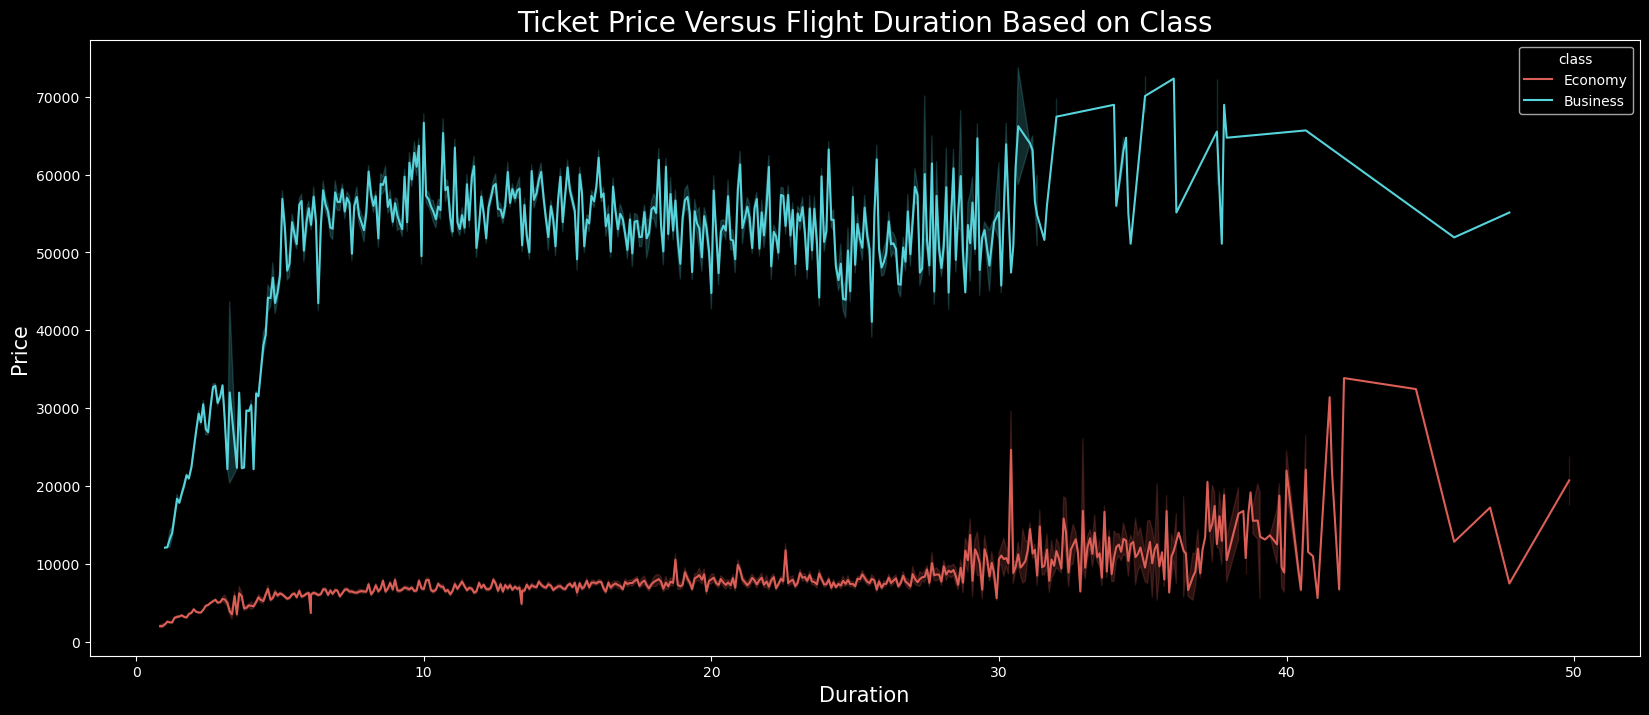

In [16]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### Days Left for Departure vs. Price

Analyze how the number of days left for departure affects ticket prices.

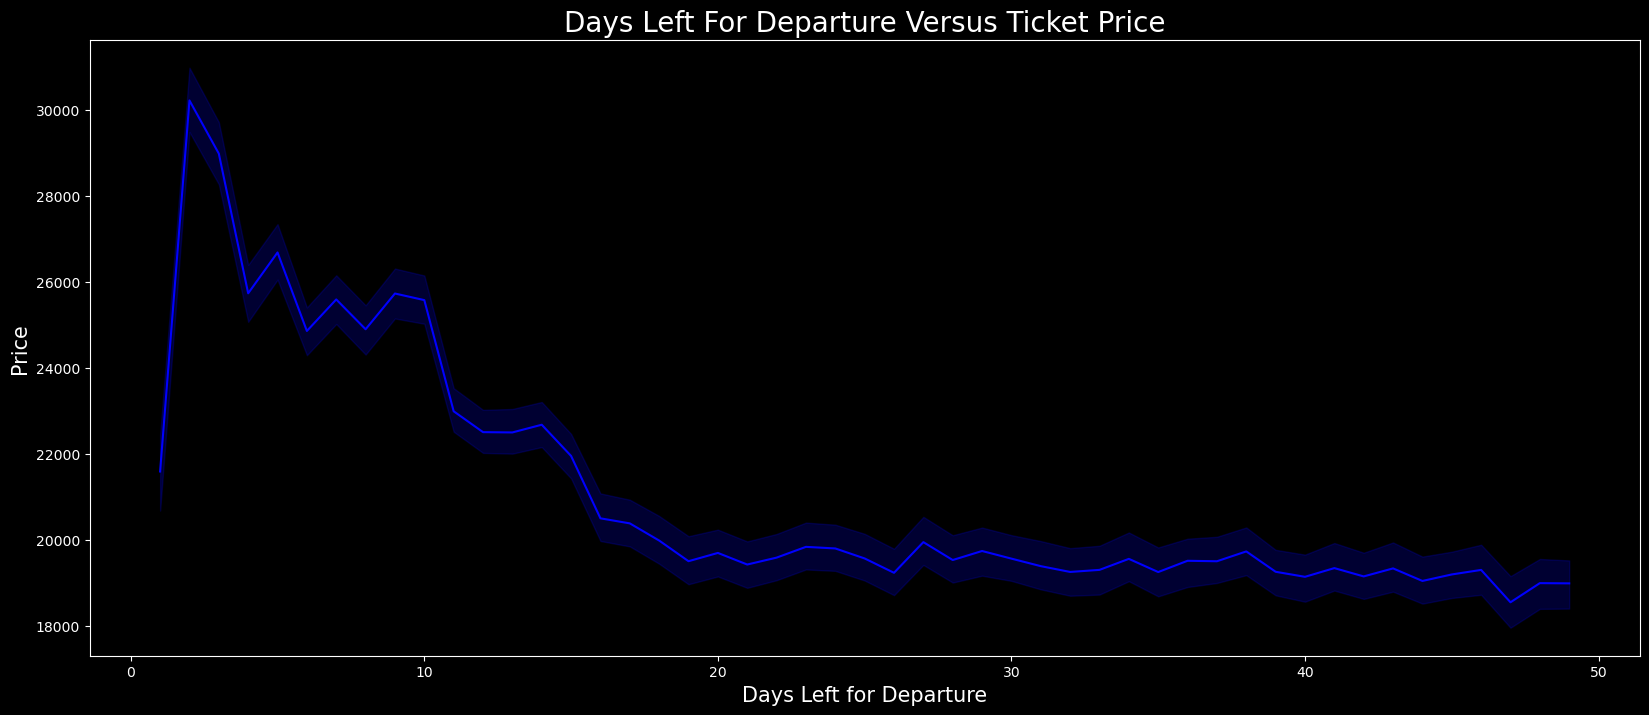

In [17]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### Days Left for Departure vs. Price by Airline

Visualize the effect of days left for departure on ticket price for each airline.

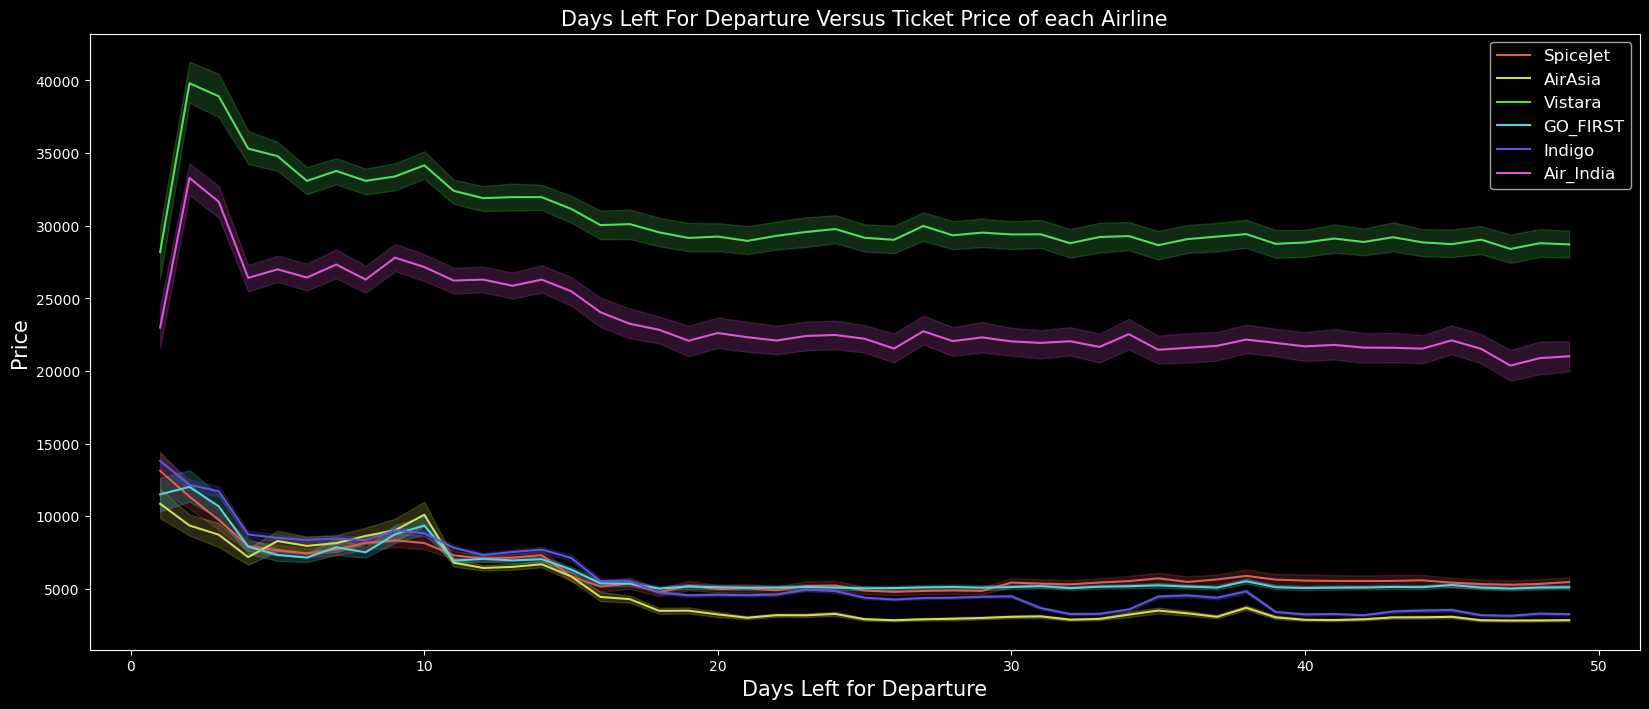

In [18]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [19]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


In [20]:
# Creating a Back up File
df_bk=df.copy()

## Feature Engineering

Convert categorical labels into numeric form to prepare the data for machine learning models.

In [21]:
# Converting categorical labels into numeric form using LabelEncoder and saving encoders
import joblib
from sklearn.preprocessing import LabelEncoder
# Create a dictionary to store encoders for each categorical column
encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le
# Save encoders dictionary to disk so the Streamlit app can reuse the same mappings
joblib.dump(encoders, 'Models/encoders.pkl')
print('Encoders saved to encoders.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'Models/encoders.pkl'

## Splitting Data

Separate the features and target variable, then split the data into training and testing sets.

In [22]:
# storing the Dependent Variables in X and Independent Variable in Y
x=df.drop(['price'],axis=1)
y=df['price']

### Train-Test Split

Split the dataset into training and testing sets for model development and evaluation.

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

In [24]:
import json
# Save the feature order used to build `x` so the deployment app follows the same column order
feature_order = x.columns.tolist()
with open('Config/feature_order.json', 'w') as f:
    json.dump(feature_order, f)
print('feature_order.json saved with', len(feature_order), 'features')

feature_order.json saved with 10 features


### Feature Scaling

Scale the feature values to ensure all variables are on a similar range for machine learning algorithms.

In [25]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)  
x_test.head(3)

,0,1,2,3,4,5,6,7,8,9
0,0.2,0.479487,0.4,0.8,0.0,0.2,0.8,1.0,0.403240,0.812500
1,1.0,0.924359,0.8,0.8,0.0,1.0,1.0,0.0,0.191816,0.854167
2,1.0,0.932051,0.8,0.8,0.0,1.0,0.0,1.0,0.206095,0.833333


## Model Comparison Setup

Create an empty DataFrame to store error metrics for comparing different regression models.

In [26]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] , 'Root_Mean_Squared_Error_RMSE':[] , 'Mean_Squared_Error_MSE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Squared_Error_MSE,R2_score


## Model Training

Build and train multiple regression models to predict flight prices.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [28]:
# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelKNN = KNeighborsRegressor(n_neighbors=5)
# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN]

## Model Evaluation

Fit each model and evaluate performance using metrics such as MAE, MSE, RMSE, and R2 score.

In [29]:
MM = [modelmlg, modeldcr, modelrfr, modelKNN]

for model in MM:
    
    # Fit the model
    model.fit(x_train, y_train)

    # Predict
    y_pred = model.predict(x_test)

    print(f"Model Name: {model.__class__.__name__}")
    
    from sklearn import metrics

    # Metrics
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)

    print("MAE:", round(mae,3))
    print("MSE:", round(mse,3))
    print("RMSE:", round(rmse,3))
    print("R2:", round(r2,5))
    print("-"*100)

    # Append to results DataFrame
    Results.loc[len(Results)] = {
        'Model Name': model.__class__.__name__,
        'Mean_Absolute_Error_MAE': mae,
        'Root_Mean_Squared_Error_RMSE': rmse,
        'Mean_Squared_Error_MSE': mse,
        'R2_score': r2
    }

Model Name: LinearRegression
MAE: 4630.296
MSE: 49070241.265
RMSE: 7005.015
R2: 0.90466
----------------------------------------------------------------------------------------------------
Model Name: DecisionTreeRegressor
MAE: 1260.563
MSE: 13709241.278
RMSE: 3702.599
R2: 0.97336
----------------------------------------------------------------------------------------------------
Model Name: RandomForestRegressor
MAE: 1170.805
MSE: 8164351.363
RMSE: 2857.333
R2: 0.98414
----------------------------------------------------------------------------------------------------
Model Name: KNeighborsRegressor
MAE: 1854.47
MSE: 14592966.689
RMSE: 3820.074
R2: 0.97165
----------------------------------------------------------------------------------------------------


## Model Comparison

Sort and compare models based on their error metrics to identify the best performing model.

In [30]:
sorted_results = Results.sort_values(by="Root_Mean_Squared_Error_RMSE", ascending=True)
print("\nModel Comparison Sorted by RMSE (Lower = Better):")
display(sorted_results)
best_model_name = sorted_results.iloc[0]["Model Name"]


Model Comparison Sorted by RMSE (Lower = Better):


,Model Name,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Squared_Error_MSE,R2_score
2,RandomForestRegressor,1170.805083,2857.332911,8.164351e+06,0.984137
1,DecisionTreeRegressor,1260.563310,3702.599260,1.370924e+07,0.973363
3,KNeighborsRegressor,1854.469527,3820.074173,1.459297e+07,0.971646
0,LinearRegression,4630.295614,7005.015436,4.907024e+07,0.904656


In [31]:
# Sort by R2 score
best_r2_model = Results.sort_values(by='R2_score', ascending=False).iloc[0]

# Sort by MAE
best_mae_model = Results.sort_values(by='Mean_Absolute_Error_MAE', ascending=True).iloc[0]

# Sort by RMSE
best_rmse_model = Results.sort_values(by='Root_Mean_Squared_Error_RMSE', ascending=True).iloc[0]

# Output best models for each metric
print("Best Model by R2 Score:", best_r2_model[0])
print("Best Model by MAE:", best_mae_model[0])
print("Best Model by RMSE:", best_rmse_model[0])

Best Model by R2 Score: RandomForestRegressor
Best Model by MAE: RandomForestRegressor
Best Model by RMSE: RandomForestRegressor


## Best Model Selection

RandomForestRegressor is identified as the best model based on evaluation metrics. It will be used for final predictions.

In [32]:
#Trainig the model with
modelrfr.fit(x_train, y_train)
    
# Predict the model with test data

y_pred = modelrfr.predict(x_test)

In [33]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

In [34]:
result.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
75150,Vistara,UK-944,Mumbai,Afternoon,one,Evening,Hyderabad,Economy,5.25,35,4099,4099,4164.89
123208,Indigo,6E-6965,Kolkata,Afternoon,one,Night,Delhi,Economy,6.92,24,6489,6489,6094.79
213336,Vistara,UK-813,Delhi,Evening,zero,Night,Bangalore,Business,2.83,19,32859,32859,34347.04
127405,Indigo,6E-6087,Kolkata,Evening,one,Late_Night,Delhi,Economy,7.00,49,4439,4439,4204.92
33171,AirAsia,I5-775,Delhi,Afternoon,one,Evening,Hyderabad,Economy,6.92,34,8733,8733,9516.28
235016,Air_India,AI-660,Mumbai,Evening,one,Afternoon,Kolkata,Business,20.50,13,49725,49725,49883.82
157954,Air_India,AI-620,Hyderabad,Early_Morning,one,Evening,Delhi,Economy,12.83,45,4387,4387,4409.48
195972,Indigo,6E-927,Chennai,Afternoon,one,Night,Bangalore,Economy,8.75,29,4257,4257,4365.94
126165,Vistara,UK-772,Kolkata,Morning,one,Night,Delhi,Economy,11.17,41,10243,10243,6639.92
15333,Vistara,UK-829,Delhi,Early_Morning,one,Morning,Bangalore,Economy,25.33,28,3357,3357,3739.18


## Predictions and Visualization

Visualize actual vs. predicted ticket prices using the best model.

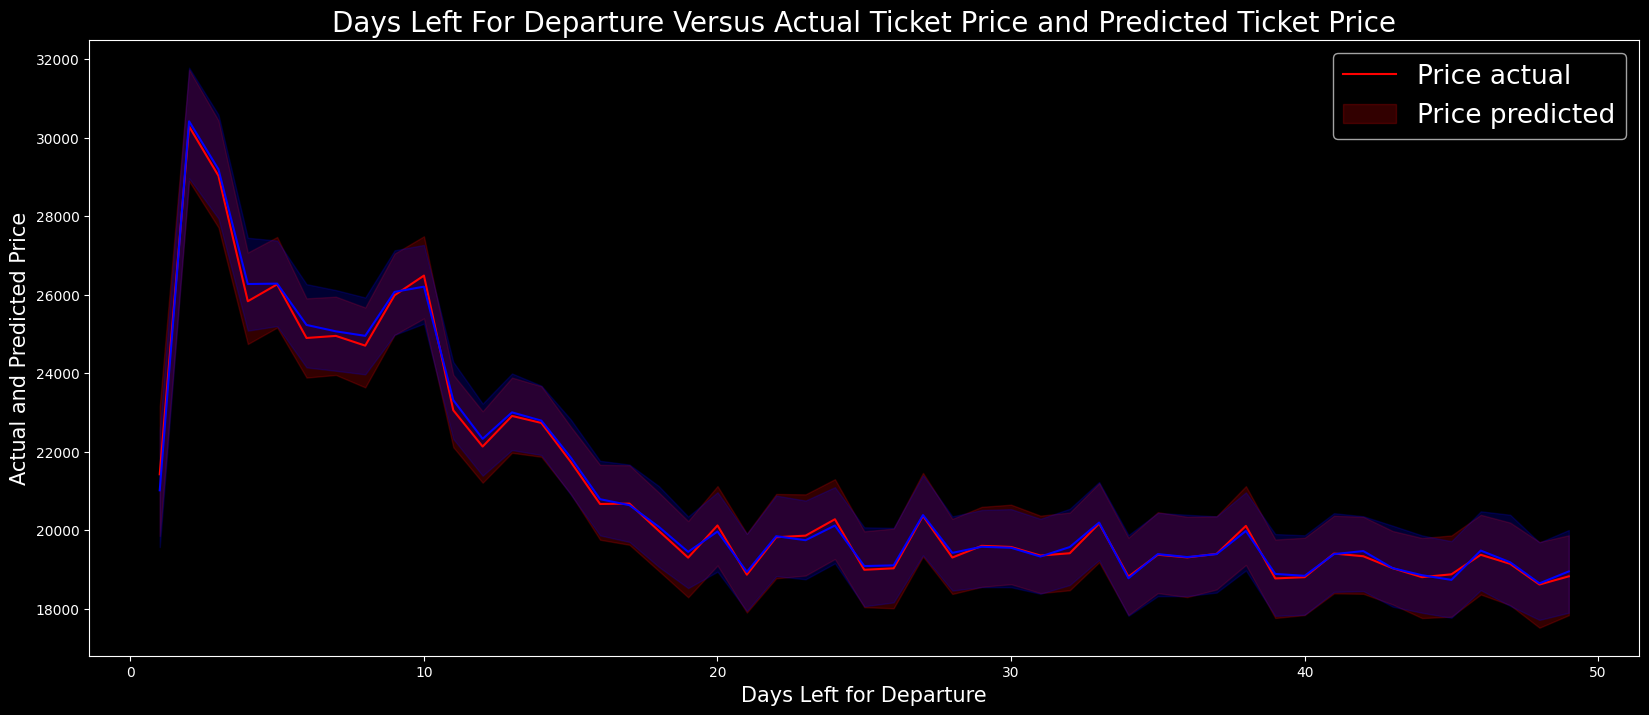

In [35]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

In [36]:
# Manual interactive prediction (notebook-friendly)
import json, joblib, numpy as np
import difflib

# Load artifacts if not in scope
try:
    encoders
except NameError:
    try:
        encoders = joblib.load('Models/encoders.pkl')
    except Exception:
        encoders = None

try:
    mmscaler
except NameError:
    try:
        mmscaler = joblib.load('Models/scaler.pkl')
    except Exception:
        mmscaler = None

try:
    best_model
except NameError:
    try:
        # prefer the chosen best model name if available
        best_model = modelrfr
    except Exception:
        best_model = None

# Load canonical feature order if available
feature_order = None
try:
    with open('Config/feature_order.json','r') as fh:
        feature_order = json.load(fh)
except Exception:
    pass

if feature_order is None:
    # fallback to x.columns if defined
    try:
        feature_order = x.columns.tolist()
    except Exception:
        raise RuntimeError("Cannot determine feature order. Ensure `feature_order.json` or `x` exists.")

print("Feature order used for prediction:", feature_order)
print("Enter values for each feature (for categorical features enter the original text label).")

user_vals = []
for col in feature_order:
    if encoders is not None and col in encoders:
        # show available classes so user can type exactly
        classes = list(encoders[col].classes_)
        print(f"\nCategorical feature: {col}")
        print("Possible values:", classes[:50])  # first 50 to avoid huge lists
        v = input(f"Enter value for '{col}': ").strip()

        # try to transform exact label first
        enc = None
        try:
            enc = encoders[col].transform([v])[0]
        except Exception:
            # maybe user entered the encoded integer index
            try:
                iv = int(v)
                if 0 <= iv < len(classes):
                    enc = iv
                else:
                    raise ValueError
            except Exception:
                # try to find close matches for typos (e.g. GE-102 -> 6E-102)
                matches = difflib.get_close_matches(v, classes, n=5, cutoff=0.5)
                if matches:
                    print("Did you mean one of these?:", matches)
                    choice = input(f"Enter corrected value or press Enter to accept '{matches[0]}': ").strip()
                    if choice == "":
                        choice = matches[0]
                    try:
                        enc = encoders[col].transform([choice])[0]
                    except Exception:
                        raise ValueError(f"Value '{v}' for column '{col}' not recognized.")
                else:
                    raise ValueError(f"Value '{v}' for column '{col}' not recognized.")
        user_vals.append(enc)
        user_vals.append(enc)
    else:
        # numeric feature
        v = input(f"Enter numeric value for '{col}': ").strip()
        try:
            fv = float(v)
        except Exception:
            raise ValueError(f"Couldn't convert '{v}' to float for column '{col}'.")
        user_vals.append(fv)

# Build numpy array and scale
X = np.array(user_vals).reshape(1, -1)
expected_features = mmscaler.n_features_in_
X = X[:, :expected_features]

# ✅ Scale safely
X_scaled = mmscaler.transform(X)

# ✅ Predict
pred = best_model.predict(X_scaled)[0]
print(f"\nPredicted Price: {pred:.2f}")

Feature order used for prediction: ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left']
Enter values for each feature (for categorical features enter the original text label).

Categorical feature: airline
Possible values: ['AirAsia', 'Air_India', 'GO_FIRST', 'Indigo', 'SpiceJet', 'Vistara']


ValueError: Value '' for column 'airline' not recognized.

## Conclusion

This notebook demonstrates a complete machine learning workflow for flight fare prediction. Multiple models were trained and evaluated, with RandomForestRegressor selected as the best performer. The approach provides actionable insights for airline pricing strategies and can be extended for further analysis or deployment.

In [37]:
# Save model, scaler, and encoders for deployment
import joblib
# Save trained RandomForest model
joblib.dump(modelrfr, 'Models/flight_price_model.pkl')
# Save fitted MinMaxScaler (fitted on X_train)
joblib.dump(mmscaler, 'Models/scaler.pkl')
# Encoders: try to save again if available in scope
try:
    joblib.dump(encoders, 'Models/encoders.pkl')
except NameError:
    print('encoders not found in scope; ensure the encoding cell ran')
print('Model, scaler, and encoders have been saved successfully!')

Model, scaler, and encoders have been saved successfully!
